# Dogs Deep learning
from http://vision.stanford.edu/aditya86/ImageNetDogs/<br/>
*Note : original notebook (not translated)*

![](https://drive.google.com/uc?export=view&id=1XTYankC2fdCFZF6ieOrG2KbbZo1Kx02T)



In [ ]:
!pip install pretty_confusion_matrix

  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pretty-confusion-matrix 0.1.1 requires matplotlib<4.0.0,>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random
import csv

from PIL import Image
from tensorflow import keras
from tensorflow.keras import  Input, layers
from tensorflow.keras.models import  Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from fonctions_reseau_neurone  import dataset_preprocessing, model_presentation, prediction_dog_race
from pretty_confusion_matrix import pp_matrix_from_data
from tensorflow.keras.utils import plot_model

 ## Importation des données

Le dataset est constitué de deux sous dossiers (dataset) : train (jeu d'entrainement) et test (jeu de test).
Importation des images de race de chien en fonction de sa race et vérification du nombre d'image en fonction de la race de chien et du type de dataset.

In [ ]:
base_dir = '/content/drive/MyDrive/dataset_dogs_full'

In [ ]:
train_dir_chihuahua = os.path.join(base_dir,'train/Chihuahua')
train_dir_labrador = os.path.join(base_dir,'train/Labrador_retriever')
train_dir_husky = os.path.join(base_dir,'train/Siberian_husky')
train_dir_basset = os.path.join(base_dir,'train/Basset')
train_dir_australian_terrier = os.path.join(base_dir,'train/Australian_terrier')
train_dir_walker_hound = os.path.join(base_dir,'train/Walker_hound')
train_dir_rottweiler = os.path.join(base_dir,'train/Rottweiler')
train_dir_samoyed = os.path.join(base_dir,'train/Samoyed')
train_dir_chow = os.path.join(base_dir,'train/Chow')
train_dir_pug = os.path.join(base_dir,'train/Pug')
train_dir_saint_bernard = os.path.join(base_dir,'train/Saint_Bernard')
train_dir_german_shepard = os.path.join(base_dir,'train/German_shepherd')

In [ ]:
test_dir_chihuahua = os.path.join(base_dir,'test/Chihuahua')
test_dir_labrador = os.path.join(base_dir,'test/Labrador_retriever')
test_dir_husky = os.path.join(base_dir,'test/Siberian_husky')
test_dir_basset = os.path.join(base_dir,'test/Basset')
test_dir_australian_terrier = os.path.join(base_dir,'test/Australian_terrier')
test_dir_walker_hound = os.path.join(base_dir,'test/Walker_hound')
test_dir_rottweiler = os.path.join(base_dir,'test/Rottweiler')
test_dir_samoyed = os.path.join(base_dir,'test/Samoyed')
test_dir_chow = os.path.join(base_dir,'test/Chow')
test_dir_pug = os.path.join(base_dir,'test/Pug')
test_dir_saint_bernard = os.path.join(base_dir,'test/Saint_Bernard')
test_dir_german_shepard = os.path.join(base_dir,'test/German_shepherd')

In [ ]:
print('Le nombre total image de chihuahua pour le dataset entrainement : ',len(os.listdir(train_dir_chihuahua)))
print('Le nombre total image de labrador pour le dataset entrainement : ',len(os.listdir(train_dir_labrador)))
print('Le nombre total image de husky pour le dataset entrainement : ',len(os.listdir(train_dir_husky)))
print('Le nombre total image de basset pour le dataset entrainement : ',len(os.listdir(train_dir_basset)))
print('Le nombre total image de australian terrier pour le dataset entrainement : ',len(os.listdir(train_dir_australian_terrier)))
print('Le nombre total image de walker hound pour le dataset entrainement : ',len(os.listdir(train_dir_walker_hound)))
print('Le nombre total image de rottweiler pour le dataset entrainement : ',len(os.listdir(train_dir_rottweiler)))
print('Le nombre total image de samoyed pour le dataset entrainement : ',len(os.listdir(train_dir_samoyed)))
print('Le nombre total image de chow pour le dataset entrainement : ',len(os.listdir(train_dir_chow)))
print('Le nombre total image de pug pour le dataset entrainement : ',len(os.listdir(train_dir_pug)))
print('Le nombre total image de saint bernard pour le dataset entrainement : ',len(os.listdir(train_dir_saint_bernard)))
print('Le nombre total image de german shepard pour le dataset entrainement : ',len(os.listdir(train_dir_german_shepard)))

Le nombre total image de chihuahua pour le dataset entrainement :  100
Le nombre total image de labrador pour le dataset entrainement :  100
Le nombre total image de husky pour le dataset entrainement :  100
Le nombre total image de basset pour le dataset entrainement :  100
Le nombre total image de australian terrier pour le dataset entrainement :  100
Le nombre total image de walker hound pour le dataset entrainement :  100
Le nombre total image de rottweiler pour le dataset entrainement :  100
Le nombre total image de samoyed pour le dataset entrainement :  100
Le nombre total image de chow pour le dataset entrainement :  100
Le nombre total image de pug pour le dataset entrainement :  100
Le nombre total image de saint bernard pour le dataset entrainement :  100
Le nombre total image de german shepard pour le dataset entrainement :  100


In [ ]:
print('Le nombre total image de chihuahua pour le dataset de test : ',len(os.listdir(test_dir_chihuahua)))
print('Le nombre total image de labrador pour le dataset de test : ',len(os.listdir(test_dir_labrador)))
print('Le nombre total image de husky pour le dataset de test : ',len(os.listdir(test_dir_husky)))
print('Le nombre total image de basset pour le dataset de test : ',len(os.listdir(test_dir_basset)))
print('Le nombre total image de australian terrier pour le dataset de test : ',len(os.listdir(test_dir_australian_terrier)))
print('Le nombre total image de walker hound pour le dataset de test : ',len(os.listdir(test_dir_walker_hound)))
print('Le nombre total image de rottweiler pour le dataset de test : ',len(os.listdir(test_dir_rottweiler)))
print('Le nombre total image de samoyed pour le dataset de test : ',len(os.listdir(test_dir_samoyed)))
print('Le nombre total image de chow pour le dataset de test : ',len(os.listdir(test_dir_chow)))
print('Le nombre total image de pug pour le dataset de test : ',len(os.listdir(test_dir_pug)))
print('Le nombre total image de saint bernard pour le dataset de test : ',len(os.listdir(test_dir_saint_bernard)))
print('Le nombre total image de german shepard pour le dataset de test : ',len(os.listdir(test_dir_german_shepard)))

Le nombre total image de chihuahua pour le dataset de test :  19
Le nombre total image de labrador pour le dataset de test :  19
Le nombre total image de husky pour le dataset de test :  19
Le nombre total image de basset pour le dataset de test :  19
Le nombre total image de australian terrier pour le dataset de test :  19
Le nombre total image de walker hound pour le dataset de test :  19
Le nombre total image de rottweiler pour le dataset de test :  19
Le nombre total image de samoyed pour le dataset de test :  19
Le nombre total image de chow pour le dataset de test :  19
Le nombre total image de pug pour le dataset de test :  19
Le nombre total image de saint bernard pour le dataset de test :  19
Le nombre total image de german shepard pour le dataset de test :  19


In [ ]:
#TODO changer fonction
print('Le nombre total image dans le dataset entrainement : ',
      len(os.listdir(train_dir_chihuahua))+
      len(os.listdir(train_dir_labrador))+
      len(os.listdir(train_dir_husky))+
      len(os.listdir(train_dir_basset))+
      len(os.listdir(train_dir_australian_terrier))+
      len(os.listdir(train_dir_walker_hound))+
      len(os.listdir(train_dir_rottweiler))+
      len(os.listdir(train_dir_samoyed))+
      len(os.listdir(train_dir_chow))+
      len(os.listdir(train_dir_pug))+
      len(os.listdir(train_dir_saint_bernard))+
      len(os.listdir(train_dir_german_shepard))
)

Le nombre total image dans le dataset entrainement :  1200


In [ ]:
print('Le nombre total image dans le dataset de test : ', 
      len(os.listdir(test_dir_chihuahua))+
      len(os.listdir(test_dir_labrador))+
      len(os.listdir(test_dir_husky))+
      len(os.listdir(test_dir_basset))+
      len(os.listdir(test_dir_australian_terrier))+
      len(os.listdir(test_dir_walker_hound))+
      len(os.listdir(test_dir_rottweiler))+
      len(os.listdir(test_dir_samoyed))+
      len(os.listdir(test_dir_chow))+
      len(os.listdir(test_dir_pug))+
      len(os.listdir(test_dir_saint_bernard))+
      len(os.listdir(test_dir_german_shepard))
)

Le nombre total image dans le dataset de test :  228


# Préprocessing

On va redimenssionner les images en 128*128 pixels pour pouvoir les données comme entrée au cnn.

In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128 
COLOR_DEPTH = 3
BATCH_SIZE = 64
NB_CATEGORIES = 12

Création du dataset d'entraînement
Found 1200 files belonging to 12 classes.
Using 960 files for training.

Création du dataset de validation
Found 1200 files belonging to 12 classes.
Using 240 files for validation.

Création du dataset de test
Found 228 files belonging to 12 classes.
(shuffle=False)

Les classes à déterminer :  ['Australian_terrier', 'Basset', 'Chihuahua', 'Chow', 'German_shepherd', 'Labrador_retriever', 'Pug', 'Rottweiler', 'Saint_Bernard', 'Samoyed', 'Siberian_husky', 'Walker_hound']

Affichage des 5 première images du dataset d'entraînement

(64, 128, 128, 3)
(64,)
image_batch est un  tensor de forme (64, 128, 128, 3). Il s'agit  d'un batch de 64 images de forme 128x128x3(la dernière dimension correspond à la colorisation RGB). Le label_batch est un tensor de forme (64,), Il correspond au labels des 64 images


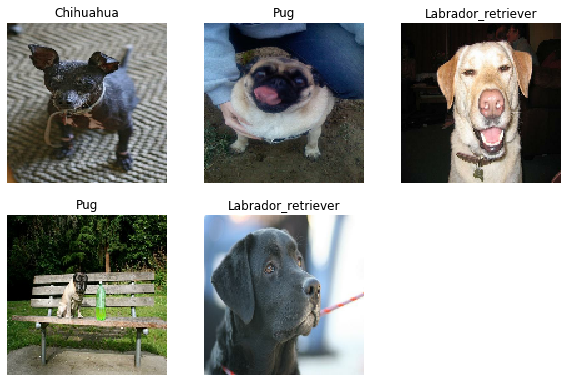

In [ ]:
result = dataset_preprocessing(base_dir, BATCH_SIZE,IMG_HEIGHT, IMG_WIDTH, COLOR_DEPTH)
train_ds = result[0]
val_ds = result[1]
test_ds = result[2]
class_names = result[3]

Labels dans le test_ds

In [ ]:
labels = []
for image, label in test_ds.take(-1):
  labels.extend(label)

labels = np.array(labels)
print(labels)

[ 1 10  8  7  7 11  6  9  5 11  7  4  3  8  1  3  6  1  1 11  0  5 10 10
  6 11  9  2  6  5  7  6  9  8  9  2  9  9 10  7 10  6  1  5  3  3 10  6
  5  3  8  2 10  8  7  4  0  1  8  6  1  1  3  5  0  8 11  1  6  1  4  0
  0 10  9  4  2  7 11  1  7  1  4  8  6  2  1  2 10  7  3  3  1  1  5  4
  4  0  9  9  1 11  6 10  2  5  7  0 10  7  2  5  5  0  5 10  2 11  5  4
  4 10  5 11  9  5  8 11  2  7 11  9  8 10  0  3  4  4  0  9  6  8 10  0
  6  3  8 10  6  0  1  0  8  2  4  7  3  9  0 10  4  8  9  2  3  7  6  1
  7  2  9 11  5  3  7 11  7 11  2  5  8  8 11  3  9  8  9  0  0  2  3  9
  4 11  3  7  6  2  7 10 11 11  3  3  5  3  8  2  4  2  5 11  6  0  1  6
  4  5  2  8  4  9  0  6 10  0  4  4]


Sauvegarde des catégories (race de chien) dans un fichier csv.

In [ ]:
with open('dog_breed.csv', 'w') as f:      
    csv.writer(f).writerow(class_names)

# Modèle du réseau de neurones

Réalisation d'un réseau de neuronnes de types cnn avec une data augmentation.

In [ ]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
#data augmentation
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
#fin du data augmentation
x = layers.Rescaling(1./255)(x) #(input_tensor)
x = layers.Conv2D(32, (3,3),padding = "same", activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
#output_tensor = layers.Dense(num_classes)(x)
output_tensor = layers.Dense(NB_CATEGORIES, activation="softmax")(x)

model = Model(input_tensor, output_tensor)

Utilisation de la fonction model_presentation pour avoir les performances du cnn sur le dataset d'entraîment avec le modele définis ci dessus

In [ ]:
model_presentation(model,train_ds, val_ds,20,keras.optimizers.Adam(learning_rate=0.001) , tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 128, 128, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 8s 131ms/step - loss: 2.5091 - accuracy: 0.0792 - val_loss: 2.4895 - val_accuracy: 0.0625
Epoch 2/20
15/15 [==============================] - 2s 74ms/step - loss: 2.4778 - accuracy: 0.0875 - val_loss: 2.4900 - val_accuracy: 0.0708
Epoch 3/20
15/15 [==============================] - 2s 76ms/step - loss: 2.4267 - accuracy: 0.1250 - val_loss: 2.4165 - val_accuracy: 0.1583
Epoch 4/20
15/15 [==============================] - 2s 74ms/step - loss: 2.3693 - accuracy: 0.1448 - val_loss: 2.4630 - val_accuracy: 0.1292
Epoch 5/20
15/15 [==============================] - 2s 74ms/step - loss: 2.3401 - accuracy: 0.1594 - val_loss: 2.3869 - val_accuracy: 0.1625
Epoch 6/20
15/15 [==============================] - 2s 73ms/step - loss: 2.2869 - accuracy: 0.2010 - val_loss: 2.3967 - val_accuracy: 0.1667
Epoch 7/20
15/15 [==============================] - 2s 75ms/step - loss: 2.2840 - accuracy: 0.1937 - val_loss: 2.3750 - val_accuracy: 0.1750
Epoch 8/20
15/15 [=====

# Prédiction d'une race de chien à partir du réseau de neuronne entraîné

Prédiction sur une images de chien prise au hasard dans le testset.

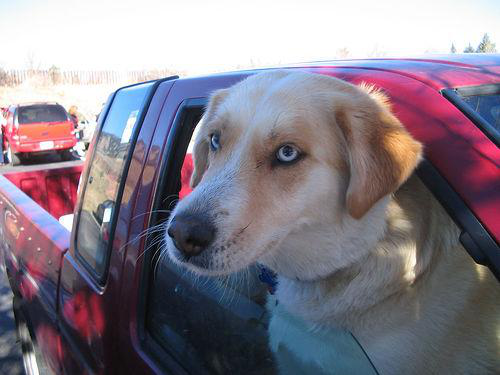

(1, 128, 128, 3)
[[1.2422270e-05 7.4231648e-05 7.4964970e-05 2.3909513e-06 8.6002410e-06
  9.9975568e-01 6.4626774e-06 1.7148445e-06 1.1961183e-06 4.0061042e-07
  3.9900489e-05 2.2037286e-05]]
Labrador_retriever

La race de chien est:Labrador_retriever 
L'ordinateur a prédit : Labrador_retriever


In [ ]:
prediction_dog_race(model, base_dir, class_names,  IMG_HEIGHT, IMG_WIDTH)

# Data augmentation sur une image

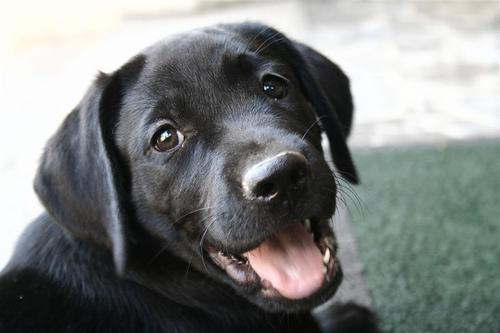

(1, 128, 128, 3)


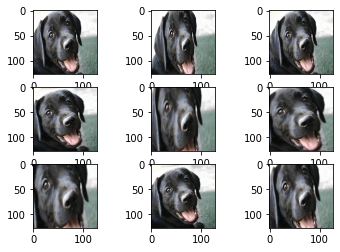

In [ ]:
path_directory = os.path.join(base_dir,'test')
dog_race_random = random.choice(os.listdir(path_directory))
path_directory_race = path_directory+'/'+dog_race_random
picture_random = random.choice(os.listdir(path_directory_race))
path_image = path_directory_race+'/'+picture_random
img = Image.open(path_image)
display(img)
img_array2 = np.array(img.resize((IMG_HEIGHT,IMG_WIDTH)))
img_array2.shape
img_array2
img_array2 = np.expand_dims(img_array2, axis=0)
print(img_array2.shape)
# Expanding dimension to one sample
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# Creating an iterator for data augmentation
it = datagen.flow(img_array2, batch_size=1)

# Preparing the Samples and Plot for displaying output
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

# Utilisation d'un réseau de neurone pré-entraîner

# MobileNetV2

In [ ]:
IMG_SHAPE = (IMG_HEIGHT,IMG_WIDTH) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(64, 4, 4, 1280)


In [ ]:
base_model.trainable  =  True # dégèle du modèle

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(64, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(64, 1)


In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
x = preprocess_input(x)
x = base_model(x) # Training=False
x = global_average_layer(x)
x = layers.Dropout(0.1)(x)
output_tensor = layers.Dense(NB_CATEGORIES, activation="softmax")(x)
modelmobilnet = tf.keras.Model(input_tensor, output_tensor)


In [ ]:
modelmobilnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelmobilnet.summary() 

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_contrast_4 (RandomCo  (None, 128, 128, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 128, 128, 3)      0   

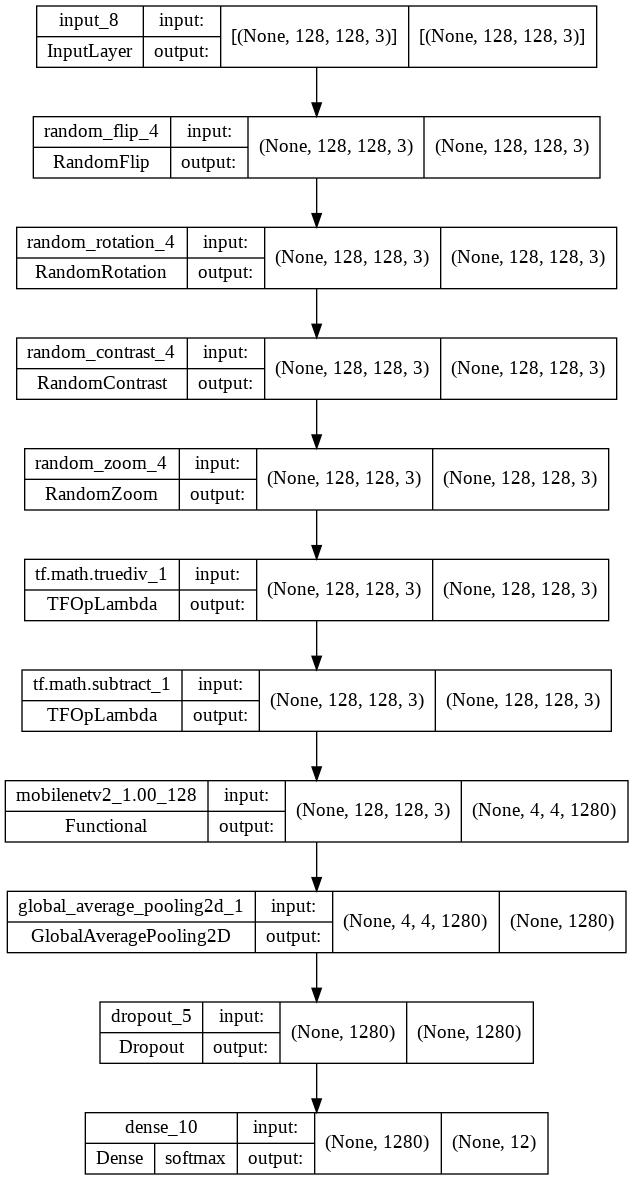

In [ ]:
plot_model(
  modelmobilnet,
  to_file='schema_model_mobilnetv2.jpg',
  show_shapes=True,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=True
)

In [ ]:
history = modelmobilnet.fit(
    train_ds, validation_data=val_ds,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 9s 253ms/step - loss: 2.1641 - accuracy: 0.3146 - val_loss: 1.1504 - val_accuracy: 0.6583
Epoch 2/20
15/15 [==============================] - 3s 174ms/step - loss: 1.3087 - accuracy: 0.5833 - val_loss: 0.6900 - val_accuracy: 0.7875
Epoch 3/20
15/15 [==============================] - 4s 202ms/step - loss: 0.9646 - accuracy: 0.6698 - val_loss: 0.5636 - val_accuracy: 0.8250
Epoch 4/20
15/15 [==============================] - 3s 180ms/step - loss: 0.8310 - accuracy: 0.7344 - val_loss: 0.4852 - val_accuracy: 0.8458
Epoch 5/20
15/15 [==============================] - 3s 176ms/step - loss: 0.6589 - accuracy: 0.7594 - val_loss: 0.3820 - val_accuracy: 0.8833
Epoch 6/20
15/15 [==============================] - 3s 177ms/step - loss: 0.6509 - accuracy: 0.7906 - val_loss: 0.3967 - val_accuracy: 0.8708
Epoch 7/20
15/15 [==============================] - 3s 179ms/step - loss: 0.5284 - accuracy: 0.8219 - val_loss: 0.4054 - val_accuracy: 0.8833
Epoch 8/20
15/15 

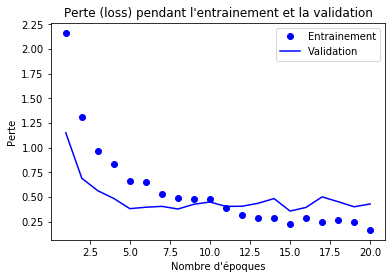

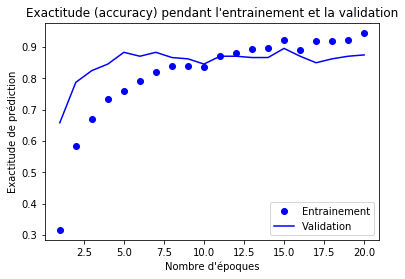

In [ ]:
#Tracé de la perte pendant l'entrainement du modèle
number_epoch = 20
loss_value = history.history['loss']
val_loss_value = history.history['val_loss']
epochs = range(1, number_epoch+1) 
plt.plot(epochs, loss_value, 'bo', label = 'Entrainement')
plt.plot(epochs, val_loss_value, 'b', label = 'Validation')
plt.xlabel("Nombre d\'époques")
plt.ylabel("Perte")
plt.title('Perte (loss) pendant l\'entrainement et la validation')
plt.legend()
plt.savefig('perte_loss_mobilenetv2.png')
plt.show()

#Tracé de l'exactitude pendant l'entrainement du modèle
acc_value = history.history['accuracy']
val_acc_value = history.history['val_accuracy']
epochs = range(1, number_epoch+1)
plt.plot(epochs, acc_value, 'bo', label = 'Entrainement')
plt.plot(epochs, val_acc_value, 'b', label = 'Validation')
plt.xlabel("Nombre d\'époques")
plt.ylabel("Exactitude de prédiction")
plt.title('Exactitude (accuracy) pendant l\'entrainement et la validation')
plt.legend()
plt.savefig('exactitude_accuracy_mobilenetv2.png')
plt.show()

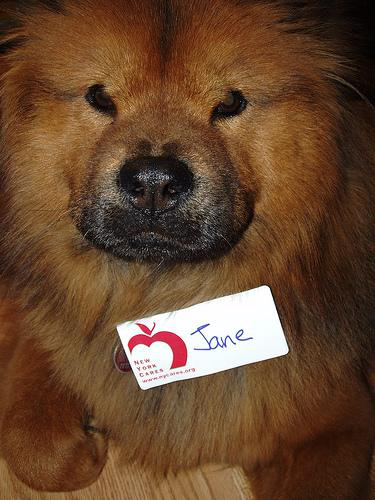

(1, 128, 128, 3)
[[1.15612806e-07 4.65702108e-08 7.74375479e-08 9.99996662e-01
  2.08360711e-06 8.03935141e-09 6.34790752e-07 1.11005647e-07
  1.94960734e-07 3.51526417e-08 1.42765275e-08 1.16530066e-08]]
Chow

La race de chien est:Chow 
L'ordinateur a prédit : Chow


In [ ]:
prediction_dog_race(modelmobilnet, base_dir, class_names,  IMG_HEIGHT, IMG_WIDTH)

Sauvegarde du modèle mobilnet

In [ ]:
modelmobilnet.save('mobilnet_model.h5')

# Vgg16

In [ ]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_ds)) # Converti les images 128*128*3 
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(64, 4, 4, 512)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
#global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [ ]:
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(NB_CATEGORIES, activation="softmax")(x)
modelvgg16 = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
# Modification par Victorien
input_tensor = Input(shape = (IMG_WIDTH,IMG_HEIGHT,COLOR_DEPTH))
x = layers.RandomFlip("horizontal_and_vertical")(input_tensor)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomContrast(0.2)(x)
x = layers.RandomZoom(0.3)(x)
x = base_model(x, training=False)
#x = global_average_layer(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
output_tensor = layers.Dense(NB_CATEGORIES, activation="softmax")(x)
modelvgg16 = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
model_presentation(modelvgg16, train_ds, val_ds, 20, tf.keras.optimizers.Adam(learning_rate=0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_contrast_3 (RandomCo  (None, 128, 128, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         1471

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 6s 304ms/step - loss: 20.5941 - accuracy: 0.1823 - val_loss: 7.6179 - val_accuracy: 0.3500
Epoch 2/20
15/15 [==============================] - 3s 157ms/step - loss: 2.9007 - accuracy: 0.2552 - val_loss: 2.7971 - val_accuracy: 0.3042
Epoch 3/20
15/15 [==============================] - 3s 155ms/step - loss: 2.2667 - accuracy: 0.2229 - val_loss: 2.7972 - val_accuracy: 0.3042
Epoch 4/20
15/15 [==============================] - 3s 154ms/step - loss: 2.2225 - accuracy: 0.2448 - val_loss: 2.6083 - val_accuracy: 0.3917
Epoch 5/20
15/15 [==============================] - 3s 156ms/step - loss: 2.1220 - accuracy: 0.2906 - val_loss: 3.1785 - val_accuracy: 0.3875
Epoch 6/20
15/15 [==============================] - 3s 159ms/step - loss: 2.0925 - accuracy: 0.2833 - val_loss: 3.4754 - val_accuracy: 0.4458
Epoch 7/20
15/15 [==============================] - 3s 155ms/step - loss: 1.9933 - accuracy: 0.3469 - val_loss: 2.9723 - val_accuracy: 0.4417
Epoch 8/20
15/15

In [ ]:
modelvgg16.save('vgg16_model.h5')

# Prédiction d'image à partir du modèle chargé

Chargement du modèle mobilnet_model basé sur le mobilnet.

In [ ]:
model = load_model("mobilnet_model.h5")

Prédiction de race de chien sur les images du test set avec le modèle chargé.

Création du test set et du tableau qui contient les races de chiens sous forme numérique :
* 0 correspond à chihuahua
* 1 correspond à labrador
* 2 correspond à husky
* etc...


In [ ]:
def count_item_repository_recursive(base_dir,subdirectory):
    """
    Comptage du nombres d'élément dans le répertoire voulu

    Args:
        base_dir (str): Arborescence du dosier qui contient le dataset
        subdirectory (str): Sous répertoire où l'on veut compter les éléments
    """

    num=0
    for i in os.walk(os.path.join(base_dir,subdirectory), topdown=True):
        num += len(i[2]) 
    return(num)

Resolution du bug slice index 64 of dimension 0 out of bounds

[3, 5, 2, 0, 1, 0, 9, 9, 1, 10, 8, 4, 7, 1, 7, 11, 8, 9, 11, 7, 11, 3, 1, 9, 4, 6, 4, 6, 8, 2, 2, 4, 2, 8, 3, 3, 3, 9, 1, 9, 0, 6, 2, 4, 2, 10, 7, 8, 6, 6, 8, 2, 7, 7, 6, 8, 7, 8, 6, 3, 6, 3, 5, 7, 0, 0, 11, 5, 0, 5, 10, 6, 8, 7, 8, 8, 5, 2, 9, 0, 9, 4, 2, 1, 11, 8, 6, 10, 7, 5, 4, 5, 1, 5, 10, 8, 5, 10, 5, 11, 2, 10, 10, 6, 1, 6, 8, 11, 10, 4, 5, 10, 10, 5, 10, 3, 0, 7, 4, 6, 4, 1, 1, 4, 3, 1, 11, 0, 5, 3, 6, 3, 1, 6, 3, 8, 4, 9, 4, 6, 6, 7, 3, 7, 4, 0, 10, 0, 10, 11, 8, 2, 11, 7, 10, 11, 8, 7, 1, 2, 3, 11, 9, 4, 10, 3, 2, 2, 11, 5, 0, 5, 0, 1, 7, 4, 11, 1, 3, 0, 11, 11, 3, 8, 4, 9, 2, 7, 3, 6, 1, 2, 11, 11, 9, 4, 1, 5, 0, 5, 10, 5, 10, 9, 11, 5, 9, 2, 1, 7, 0, 9, 0, 0, 9, 4, 8, 6, 9, 2, 1, 9, 7, 3, 9, 10, 0, 2]


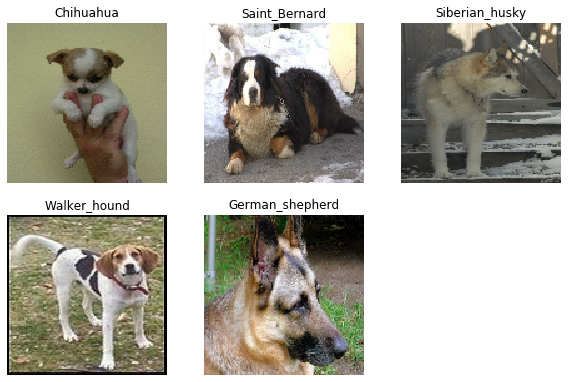

In [ ]:
dogs_race_number = []
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for images, labels in test_ds: # On passe 4 fois dans cette boucle : 3 batch de 64 et 1 batch de 36 pour 228 images test
    for label in labels:
      dogs_race_number.append(label.numpy()) 


print(dogs_race_number)

Prédiction des races de chiens contenus dans le dataset de test grâce au mobilnet et retourne un numpy array qui contient la probabilité de la race pour une image donnée.

In [ ]:
preds = model.predict(test_ds)
print(preds)

[[2.7807697e-04 2.7465384e-04 9.7363169e-05 ... 8.3840569e-06
  7.9424732e-04 5.0397910e-04]
 [2.2679578e-06 5.5743578e-05 4.4484637e-05 ... 1.1525511e-06
  4.3304553e-05 9.9981683e-01]
 [1.3847757e-02 2.5917524e-01 7.4000999e-02 ... 2.4939086e-03
  3.2068402e-01 6.1624724e-04]
 ...
 [2.3315345e-06 1.0387274e-05 1.9975840e-05 ... 8.1588318e-05
  9.9858642e-01 1.2147156e-04]
 [4.3396056e-05 7.2788884e-05 1.0392848e-05 ... 1.6445489e-06
  1.0398270e-05 8.0539185e-06]
 [7.4651034e-05 6.5017130e-06 2.2583188e-05 ... 2.8474506e-06
  7.9920355e-06 2.2830040e-04]]


Création d'une liste qui contient la prédiction des races de chiens la plus probable 

In [ ]:
prediction_race_dog = []
for prob in preds :
    prediction_race_dog.append(np.argmax(prob))

print(prediction_race_dog)

[4, 11, 10, 4, 11, 0, 11, 7, 6, 11, 5, 10, 4, 8, 10, 9, 5, 9, 9, 9, 11, 11, 1, 0, 8, 10, 8, 4, 6, 10, 0, 5, 8, 11, 5, 6, 6, 10, 9, 11, 3, 1, 7, 1, 8, 3, 9, 4, 8, 6, 5, 2, 4, 8, 9, 6, 3, 4, 3, 6, 11, 6, 6, 3, 2, 5, 6, 0, 5, 7, 8, 2, 5, 11, 0, 5, 11, 2, 2, 2, 5, 3, 11, 0, 0, 5, 11, 8, 9, 0, 10, 9, 0, 9, 11, 7, 7, 7, 11, 3, 9, 11, 2, 4, 0, 1, 5, 11, 9, 4, 2, 0, 5, 4, 11, 6, 9, 5, 11, 6, 7, 5, 4, 3, 5, 10, 0, 4, 7, 3, 6, 6, 10, 4, 0, 10, 1, 0, 6, 3, 4, 10, 8, 1, 7, 9, 11, 0, 10, 1, 11, 9, 6, 11, 5, 3, 5, 7, 1, 4, 9, 11, 7, 8, 9, 3, 6, 8, 4, 11, 7, 4, 7, 6, 1, 5, 9, 7, 4, 11, 6, 2, 10, 2, 3, 5, 11, 11, 8, 7, 9, 10, 7, 2, 0, 8, 0, 4, 0, 5, 10, 0, 10, 9, 2, 10, 5, 11, 4, 7, 4, 8, 10, 7, 0, 1, 2, 3, 7, 1, 2, 8, 2, 9, 4, 10, 5, 7]


Génération de la matrice de confusion entre les races prédites et les vrais races

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

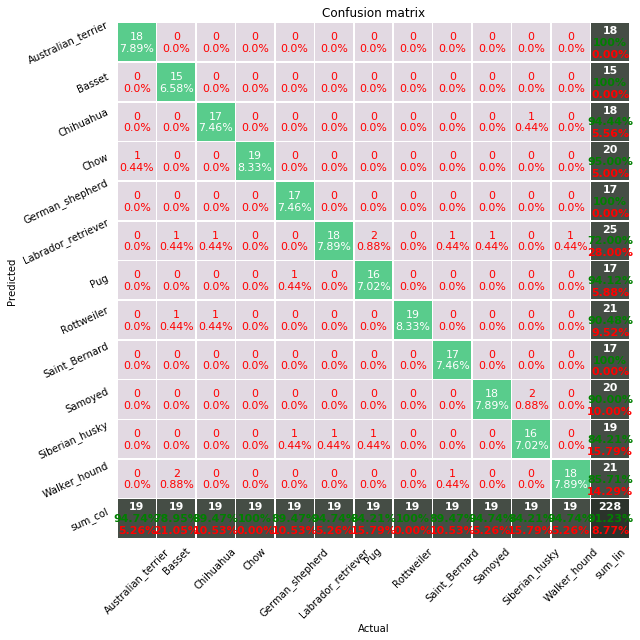

In [ ]:
pp_matrix_from_data(dogs_race_number, prediction_race_dog, cmap = 'twilight', cbar = True, columns = class_names)